# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

### Task 1.1

Let $B.\textrm{shape} = (m, n)$. Then $X$ must have $m$ columns.

$k$-th column of $A X B$:
$$(A X B)_{:, k} = A X B_{:, k} = A \sum_{i = 1}^m X_{:, i} b_{ik} = \sum_{i = 1}^m (b_{ik} A \cdot X_{:, i}) = \begin{bmatrix} b_{1k} A & b_{2k} A & \ldots & b_{mk} A \end{bmatrix} \begin{bmatrix} X_{:, 1} \\ X_{:, 2} \\ \vdots \\ X_{:, m} \end{bmatrix} = ((B_{:, k})^\top \otimes A) \mathrm{vec}(X), \,\,\, k = 1, \ldots, n$$

$$\mathrm{vec}(A X B) = \begin{bmatrix} (A X B)_{:, 1} \\ \vdots \\ (A X B)_{:, n} \end{bmatrix} = \begin{bmatrix} (B_{:, 1})^\top \otimes A \\ \vdots \\ (B_{:, n})^\top \otimes A \end{bmatrix} \mathrm{vec}(X) = (B^\top \otimes A) \mathrm{vec}(X)$$

If reshape is rowwise, denote it as $\mathrm{vecr}$. Let $A.\textrm{shape} = (p, q)$. Then $X$ must have $q$ rows.

$k$-th row of $A X B$:

$$(A X B)_{k, :} = A_{k, :} X B = \sum_{i = 1}^q a_{ki} X_{i, :} B = \sum_{i = 1}^q (X_{i, :} \cdot a_{ki} B) = \begin{bmatrix} X_{1, :} & \dots & X_{q, :} \end{bmatrix} \begin{bmatrix} a_{k1} B \\ \vdots \\ a_{kq} B \end{bmatrix} = \mathrm{vecr}(X)^\top ((A_{k, :})^\top \otimes B)$$

$$\mathrm{vecr}(A X B) = \begin{bmatrix} ((A X B)_{1, :})^\top \\ \vdots \\ ((A X B)_{p, :})^\top \end{bmatrix} = \begin{bmatrix} (\mathrm{vecr}(X)^\top ((A_{1, :})^\top \otimes B))^\top \\ \vdots \\ (\mathrm{vecr}(X)^\top ((A_{p, :})^\top \otimes B))^\top \end{bmatrix}$$

Using the transpose property of the Kronecker product (https://en.wikipedia.org/wiki/Kronecker_product#Relations_to_other_matrix_operations) that $(A \otimes B)^\top = A^\top \otimes B^\top$:

$$\mathrm{vecr}(A X B) = \begin{bmatrix} A_{1, :} \otimes B^\top \\ \vdots \\ A_{p, :} \otimes B^\top \end{bmatrix} \mathrm{vecr}(X) = (A \otimes B^\top) \mathrm{vecr}(X)$$

### Task 1.2

Let $A.\textrm{shape} = (m, n)$ and $B.\textrm{shape} = (p, q)$, then $(A \otimes B).\textrm{shape} = (m p, n q)$. This means $x$ must have $n q$ elements. And the result of $(A \otimes B) x$ has $m p$ elements.

Each entry in the Kronecker product is a product of 2 scalars from $A$ and $B$, so, assuming constant-time entry lookup in $A$ and $B$, the complexity of Kronecker product is $O(m n p q)$. Next, multiplying $(A \otimes B)$ by $x$ takes $O(n q)$ operations for each of $m p$ elements of the result which also gives $O(m n p q)$ complexity. In total, naive computation has $O(m n p q)$ complexity.

The complexity can be reduced using the results of **task 1.1**. Let $X = \mathrm{reshape}(x, (q, n))$. Then, $(A \otimes B) x = \mathrm{vec}(B X A^\top)$. If reshaping is efficient, that is if the memory reallocations do not take place and only the indexing rules change, the $\mathrm{vec}$ operation can be considered to have constant time complexity, $O(1)$. If this is true, we can also not consider the transposition complexity. Then the total complexity of multiplication three matrices with shapes $(p, q)$, $(q, n)$ and $(n, m)$ will be $O(p q n + q n m)$. Now we have more efficient result than the naive approach $O(m n p q)$.

### Task 1.3

Using the mixed-product property and the inverse of a Kronecker product property from https://en.wikipedia.org/wiki/Kronecker_product#Relations_to_other_matrix_operations:

$$A \otimes I + I \otimes B = S_A \Lambda_A S_A^{-1} \otimes S_B S_B^{-1} + S_A S_A^{-1} \otimes S_B \Lambda_B S_B^{-1} = (S_A \Lambda_A \otimes S_B)(S_A^{-1} \otimes S_B^{-1}) + (S_A \otimes S_B \Lambda_B)(S_A^{-1} \otimes S_B^{-1}) = (S_A \Lambda_A \otimes S_B + S_A \otimes S_B \Lambda_B)(S_A^{-1} \otimes S_B^{-1}) = ((S_A \otimes S_B)(\Lambda_A \times I) + (S_A \otimes S_B)(I \otimes \Lambda_B))(S_A \otimes S_B)^{-1} = (S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B)(S_A \otimes S_B)^{-1} = S \Lambda S^{-1}$$

### Task 1.4.1

From lecture 11: with the optimal choice of $\tau$, the $L_2$ norm of error at $k$-th Richardson iteration $\|e_k\|_2 \le q^k \|e_0\|_2 \implies$ relative error is $\frac{\|e_k\|_2}{\|e_0\|_2} \le q^k$

$$\varkappa = \mathrm{cond}(A) = \frac{\lambda_\max}{\lambda_\min} = \frac{1000}{\frac{1}{1000}} = 10^6$$

From lecture 11:

$$q = \frac{\varkappa - 1}{\varkappa + 1} = \frac{999999}{1000001} \approx 1$$

In order to achieve $10^{-4}$ accuracy, $q^k \le 10^{-4} \implies k \le \log_q 10^{-4} = -4 \frac{\lg 10}{\lg q} = -\frac{4}{\lg q} \sim 4.5 \cdot 10^6$ iterations.

We are going to need millions of Richardson iterations to converge.

### Task 1.4.2

From lecture 11, relative error at $(k + 1)$-th Chebyshev iteration is $\frac{\|e_{k + 1}\|_2}{\|e_0\|_2} \le C q^k$

$$q = \frac{\sqrt{\varkappa} - 1}{\sqrt{\varkappa} + 1} \approx 0.9980...$$

$$C q^k \le 10^{-4} \implies k \le -\log_q C - 4 \log_q 10 = -\frac{4 + \lg C}{\lg q} \sim 10^4$$ for $C$ as large as $10^5$, which is better than Richardson iterations.

### Task 1.4.3

From lecture 12: if the matrix has only $m$ different eigenvalues, CG converges in $m$ iterations. In the worst case scenario the algorithm converges in at most 1001 (rank of our matrix) iterations because under the hood it minimizes a quadratic functional.

From https://en.wikipedia.org/wiki/Conjugate_gradient_method#Convergence_theorem, the relative error at $k$-th iteration can be estimated as:

$$\frac{\|e_k\|_A}{\|e_0\|_A} \le 2 q^k$$

$$q = \frac{\sqrt{\varkappa} - 1}{\sqrt{\varkappa} + 1} \approx 0.9980...$$

This corresponds to Chebyshev iteration case with $C = 2$:

$$2 q^k \le 10^{-4} \implies k \le -\frac{4 + \lg 2}{\lg q} \sim 5 \cdot 10^3$$

Number of iterations to converge to $10^{-4}$ is bounded theoretically by $5000$ iterations but in fact it is going to take much less.

### Task 1.5

In [8]:
# Your solution is here
import numpy as np
import scipy.sparse as scp

In [34]:
def get_A(n=1000):
    return scp.diags((*list(np.arange(1, n + 1) / n), n), format='csr')

In [160]:
get_A(10).toarray()

array([[ 0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.7,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.8,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.9,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , 10. ]])

In [140]:
def richardson(b, tol=1e-4, x=None):
    A = get_A(b.size - 1)
    tau = 2 / (A[0, 0] + A[-1, -1])
    if x is None:
        x = np.ones((A.shape[0], 1))
    e0 = np.linalg.norm(A @ x - b)
    err = e0
    res = [1.]
    
    while err > tol and len(res) <= 1e9:
        r = A @ x - b
        x -= tau * r
        err = np.linalg.norm(r) / e0
        res.append(err)

    if len(res) > 1e9:
        print(f'Max number of iterations reached - {len(res)}')
    return x, res

In [141]:
_, res = richardson(np.ones((1001, 1)))
print(f'Richardson iteration took {len(res)} iterations')

Richardson iteration took 4605090 iterations


In [142]:
import matplotlib.pyplot as plt

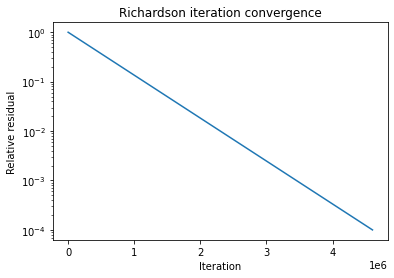

In [143]:
plt.semilogy(res)
plt.xlabel('Iteration')
plt.ylabel('Relative residual')
plt.title('Richardson iteration convergence');

In [144]:
min(res)

9.999981493746652e-05

Richardson iteration has converged to $10^{-4}$ in $4605090$ iterations as we predicted.

In [146]:
def chebyshev(b, niters=4096, x=None):
    A = get_A(b.size - 1)
    roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
    taus = [(A[-1, -1] + A[0, 0] - (A[0, 0] - A[-1, -1]) * r) / 2 for r in roots]
    if x is None:
        x = np.ones((A.shape[0], 1))
    r = A @ x - b
    e0 = np.linalg.norm(r)
    res = [1.]
    
    for i in range(niters):
        x -= 1 / taus[i] * r
        r = A @ x - b
        err = np.linalg.norm(r)
        res.append(err / e0)
        
    return x, res

In [155]:
_, res = chebyshev(np.ones((1001, 1)), niters=2*2*16384)

C:\Users\kuzne\AppData\Local\Temp/ipykernel_13428/2685103172.py:12: RuntimeWarning: overflow encountered in multiply
  x -= 1 / taus[i] * r
C:\Users\kuzne\AppData\Local\Temp/ipykernel_13428/2685103172.py:12: RuntimeWarning: invalid value encountered in subtract
  x -= 1 / taus[i] * r


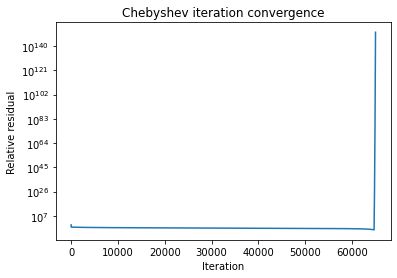

In [156]:
plt.semilogy(res)
plt.xlabel('Iteration')
plt.ylabel('Relative residual')
plt.title('Chebyshev iteration convergence');

In [158]:
min(res)

0.00011866895574707502

Chebyshev iteration has converged to $10^{-4}$ in $6 \cdot 10^5$ iterations as we predicted. The plot of the residual shows that at some point the error starts to grow because we didn't implement permutation of roots for Chebyshev polynomials but it is ok since we only wanted to see how fast we could reach $10^{-4}$ error.

In [220]:
import scipy.sparse.linalg as scpl

In [228]:
def cg_callback(_):
    cg_callback.count += 1
    print(f'CG iteration: {cg_callback.count}')
cg_callback.count = 0

scpl.cg(get_A(n=1000), np.ones((1001, 1)), tol=1e-4, callback=cg_callback);

CG iteration: 1
CG iteration: 2
CG iteration: 3
CG iteration: 4
CG iteration: 5
CG iteration: 6
CG iteration: 7
CG iteration: 8
CG iteration: 9
CG iteration: 10
CG iteration: 11
CG iteration: 12
CG iteration: 13
CG iteration: 14
CG iteration: 15
CG iteration: 16
CG iteration: 17
CG iteration: 18
CG iteration: 19
CG iteration: 20
CG iteration: 21
CG iteration: 22
CG iteration: 23
CG iteration: 24
CG iteration: 25
CG iteration: 26
CG iteration: 27
CG iteration: 28
CG iteration: 29
CG iteration: 30
CG iteration: 31
CG iteration: 32
CG iteration: 33
CG iteration: 34
CG iteration: 35
CG iteration: 36
CG iteration: 37
CG iteration: 38
CG iteration: 39
CG iteration: 40
CG iteration: 41
CG iteration: 42
CG iteration: 43
CG iteration: 44
CG iteration: 45
CG iteration: 46
CG iteration: 47
CG iteration: 48
CG iteration: 49
CG iteration: 50
CG iteration: 51
CG iteration: 52
CG iteration: 53
CG iteration: 54
CG iteration: 55
CG iteration: 56
CG iteration: 57
CG iteration: 58
CG iteration: 59
CG ite

CG converged in 140 iterations - even faster than we expected.

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

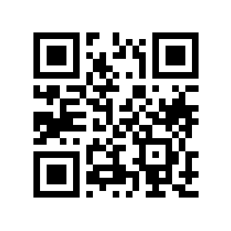

In [1]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [ ]:
def T_matvec(x, aplha):
    pass

# T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
# your code is here

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [ ]:
# your code is here

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [ ]:
# your code is here

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [ ]:
def T_lmbda_matvec(x, aplha, lmbda):
    pass

# your code is here

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [ ]:
def C_inv_matvec(x, alpha, lmbda):
    pass

# your code is here